# Tarea 1A
***Autores:** Pablo Montes, Joaquín Pelle y Oscar Reula*
### Importante 1: ###
Este notebook está diseñado para ejecutar en Julia.

### Importante 2: ###
Renombre el archivo como (según corresponda): 
**apellido_nombre_tarea_1.ipynb** o **grupo_tarea_1.ipynb**

**Todo el código generado y la presentación deberá estar incluida en este notebook.**

**Antes de entregar, serciorese que todas las variables estén bien definidas, para ello interrumpa el kernel y corra todo desde cero.**

**El objetivo de las primeras tareas (A y B) es variado:**

1. Construir algunos integradores simples y aplicarlos a problemas en 1 y 2 dimensiones.
2. Estudiar convergencia y determinar el factor Q del método.
3. Estudia la región de convergencia de los métodos.
4. Comprobar cualitativa y cuantitativamente los errores de la aproximación.
5. Familiarizarse con las librerías de integradores de ODEs.
6. Familiarizarse con el manejo y estudio de soluciones para casos de complejidad media.
7. Estudiar el caso stiff y los métodos IMEX.

**1)** La ecuación diferencial

$$
\frac{dy}{dt} = \lambda y
$$

tiene como solución la función 
$$ y(t) = y_0e^{\lambda t}, $$
donde $y_0$ es una constante que depende del dato inicial, es el valor de $y(t)$ en $t=0$.

Buscamos una aproximación numérica utilizando el *método de Euler*,
$$y(t+\Delta t) \approx y(t) + \Delta t \dfrac{dy}{dt}(t) = y(t) + \Delta t \lambda y(t)$$
tomando $\lambda = 2$ y dato inicial $y(0) = 1$ en el intervalo de tiempo $[0,2]$.


**Implementación del método:**

Una forma simple de implementar el método de Euler sería la siguiente
```julia
#Datos iniciales
λ = 2
y0 = 1
#Cantidad de pasos temporales y dt
Tfin = 2.0
N = 201
dt = Tfin/(N-1)

#Vectores donde guardamos la solución
tiempos = zeros(N)
y = zeros(N)
#Asignamos el dato inicial
y[1] = y0
#Evolución temporal usando el método de Euler
for i in 2:N
    tiempos[i] = dt*(i-1)      #Actualizamos el valor de t
    y[i] = y[i-1] + dt*λ*y[i-1]  #Hacemos un paso de Euler
end
```


Lo que haremos es partir este procedimiento en algunas funciones pequeñas, de manera que cuando en el futuro queramos cambiar de método numérico, o resolver otra ecuación diferencial, esto se pueda hacer de manera directa. Las funciones que usaremos están en el archivo ``myODEfunctions.jl``

In [638]:
include("myODEfunctions.jl")

myODEsolver (generic function with 1 method)

Nuestra implementación del método de Euler entonces será la siguiente: (esto será similar a la librería `DifferentialEquations.jl` que usaremos más adelante)

In [639]:
#1) Datos del problema:

CrecimientoExponencial(y, t, λ) = λ*(y) # Definimos el término derecho de la ODE
y0 = 1.0                                # Datos iniciales
T = (0.0, 4.0)                          # Intervalo temporal
λ = 2.;par = (λ)                        # Parámetros del problema (dentro de una tupla)

#Guardamos los datos en la variable "prob"
prob = myODEproblem(CrecimientoExponencial, y0, T, par)

(CrecimientoExponencial, 1.0, (0.0, 4.0), 2.0)

Elegimos una cantidad de pasos temporales apropiados y resolvemos:

In [640]:
N = 101 # Cantidad de pasos temporales
# Resolvemos el problema "prob" usando el método "EulerStep" 
dt = (T[2]-T[1])/(N-1) # discretizando con N pasos (dt = (Tfin-Tini)/(N-1))
t, y = myODEsolver(prob, EulerStep, dt = dt)

([0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36  …  3.64, 3.68, 3.72, 3.7600000000000002, 3.8000000000000003, 3.84, 3.88, 3.92, 3.96, 4.0], [1.0; 1.08; … ; 2036.8159780937817; 2199.761256341284;;])

Una vez obtenida la solución la graficamos.

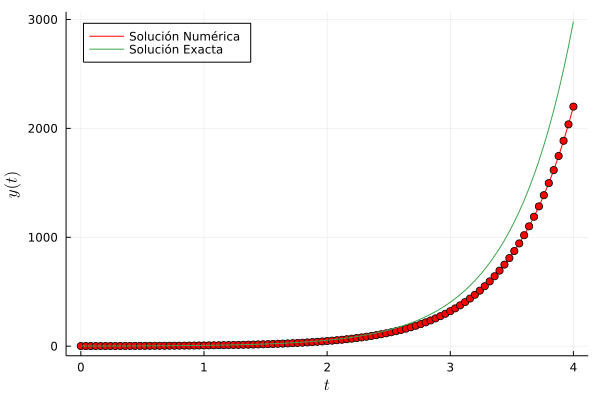

In [641]:
using Plots
gr()
plt = plot()
plot!(plt, t, y, color = :red, label = "Solución Numérica")
scatter!(plt, t, y, color = :red, label = "")
plot!(plt, t, y0*exp.(λ*t), label = "Solución Exacta")
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)

### Problema 1: ###

***1a)*** Juegue con distintos valores de `dt` (`N`) y datos iniciales. Vea qué sucede a medida que aumenta o disminuye `dt`. 

In [642]:
N = 201
dt = (T[2]-T[1])/(N-1)
t2, y2 = myODEsolver(prob, EulerStep, dt = dt)

([0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18  …  3.8200000000000003, 3.84, 3.86, 3.88, 3.9, 3.92, 3.94, 3.96, 3.98, 4.0], [1.0; 1.04; … ; 2452.644029899748; 2550.749791095738;;])

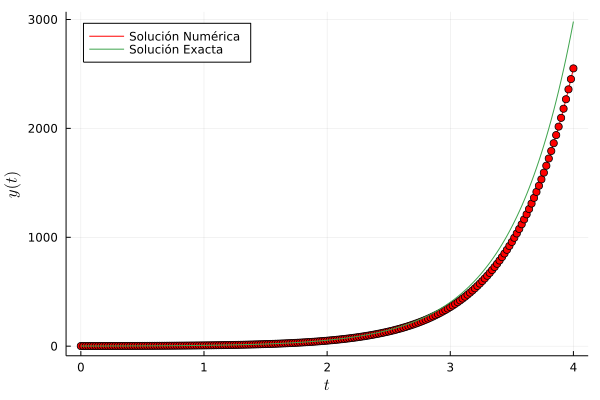

In [643]:
plt2 = plot()
plot!(plt2, t2, y2, color = :red, label = "Solución Numérica")
scatter!(plt2, t2, y2, color = :red, label = "")
plot!(plt2, t2, y0*exp.(λ*t2), label = "Solución Exacta")
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$")
plot!(plt2, legend = :topleft)

***1b)*** ¿Cómo se comporta el sistema si $\lambda$ y/o $y_0$ son números complejos?. Pruebe con $\lambda$ imaginario. Grafique. 

*Pista 1: Un número complejo $c = a + bi$ se define en julia como como `c = a + bim`. Las funciones `real(c)` e `imag(c)` retornan `a` y `b` respectivamente.*

*Pista 2: Si toma $\lambda$ complejo, también debe tomar el dato inicial como número complejo, aunque sea real, por ejemplo $y_0 = 1.0 + 0.0im$*

In [644]:
y0 = ComplexF64(1.0+0.0*im)             # Datos iniciales
T = (0.0, 4.0)                          # Intervalo temporal
λ = ComplexF64(1.0+1.0*im);par = (λ)    # Parámetros del problema (dentro de una tupla)

#Guardamos los datos en la variable "prob"
prob = myODEproblem(CrecimientoExponencial, y0, T, par)


(CrecimientoExponencial, 1.0 + 0.0im, (0.0, 4.0), 1.0 + 1.0im)

In [645]:
N = 101 # Cantidad de pasos temporales
# Resolvemos el problema "prob" usando el método "EulerStep" 
dt = (T[2]-T[1])/(N-1) # discretizando con N pasos (dt = (Tfin-Tini)/(N-1))
t, y = myODEsolver(prob, EulerStep, dt = dt)

([0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36  …  3.64, 3.68, 3.72, 3.7600000000000002, 3.8000000000000003, 3.84, 3.88, 3.92, 3.96, 4.0], ComplexF64[1.0 + 0.0im; 1.04 + 0.04im; … ; -41.14065379420005 - 32.208816443256936im; -41.497927288237776 - 35.142795252755214im;;])

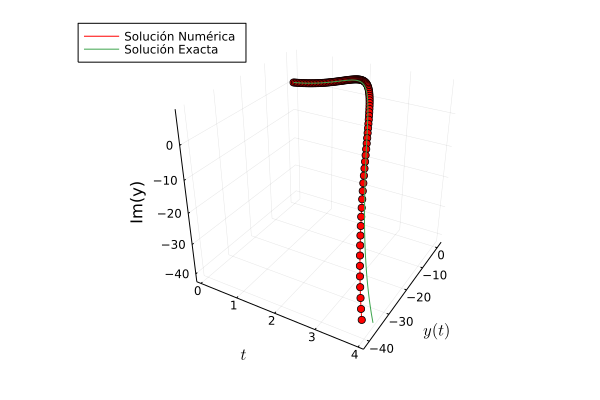

In [646]:
gr()
plt = plot()
plot!(plt, t, y, color = :red, label = "Solución Numérica")
scatter!(plt, t, y, color = :red, label = "")
plot!(plt, t, y0*exp.(λ*t), label = "Solución Exacta")
plot!(ylabel = "\$y(t)\$", xlabel = "\$t\$")
plot!(plt, legend = :topleft)

***1c)*** Utilice varios N para calcular el factor $Q$ del método de Euler.

In [647]:
# definimos parámetros iniciales
y0 = Float64(1.0)              # Datos iniciales
T = (0.0, 4.0)                 # Intervalo temporal
λ = Float64(2.0) ;par = (λ)    # Parámetros del problema (dentro de una tupla)

2.0

In [648]:
# calculamos solución con n pasos

# Guardamos los datos en la variable "prob"
prob = myODEproblem(CrecimientoExponencial, y0, T, par)

N1 = 101

# Resolvemos el problema "prob" usando el método "EulerStep"
# discretizando con N pasos (dt = (Tfin-Tini)/(N-1))
dt = (T[2]-T[1])/(N1-1)

t, y_N1 = myODEsolver(prob, EulerStep, dt = dt)

([0.0, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36  …  3.64, 3.68, 3.72, 3.7600000000000002, 3.8000000000000003, 3.84, 3.88, 3.92, 3.96, 4.0], [1.0; 1.08; … ; 2036.8159780937817; 2199.761256341284;;])

In [649]:
# calculamos solución con 2n pasos

# Guardamos los datos en la variable "prob"
prob = myODEproblem(CrecimientoExponencial, y0, T, par)

N2 = 2*N1

# Resolvemos el problema "prob" usando el método "EulerStep"
# discretizando con N pasos (dt = (Tfin-Tini)/(N-1))
dt = (T[2]-T[1])/(N2-1)

t, y_N2 = myODEsolver(prob, EulerStep, dt = dt)

([0.0, 0.01990049751243781, 0.03980099502487562, 0.05970149253731343, 0.07960199004975124, 0.09950248756218905, 0.11940298507462686, 0.13930348258706468, 0.15920398009950248, 0.1791044776119403  …  3.8208955223880596, 3.8407960199004973, 3.860696517412935, 3.8805970149253732, 3.900497512437811, 3.9203980099502487, 3.9402985074626864, 3.960199004975124, 3.9800995024875623, 4.0], [1.0; 1.0398009950248757; … ; 2454.967449170541; 2552.677596401209;;])

In [650]:
# calculamos solución con 4n pasos

# Guardamos los datos en la variable "prob"
prob = myODEproblem(CrecimientoExponencial, y0, T, par)

N3 = 2*N2

# Resolvemos el problema "prob" usando el método "EulerStep"
# discretizando con N pasos (dt = (Tfin-Tini)/(N-1))
dt = (T[2]-T[1])/(N3-1)

t, y_N3 = myODEsolver(prob, EulerStep, dt = dt)

([0.0, 0.009925558312655087, 0.019851116625310174, 0.02977667493796526, 0.03970223325062035, 0.04962779156327543, 0.05955334987593052, 0.06947890818858561, 0.0794044665012407, 0.08933002481389578  …  3.9106699751861043, 3.9205955334987594, 3.930521091811414, 3.9404466501240694, 3.9503722084367245, 3.9602977667493797, 3.970223325062035, 3.9801488833746896, 3.990074441687345, 4.0], [1.0; 1.0198511166253101; … ; 2702.6129003939805; 2756.2627842727693;;])

In [651]:
# creamos función para calcular el factor Q
function Q_factor(sol_n,sol_2n,sol_4n)

    num=(sol_n[length(sol_n)]-sol_2n[length(sol_2n)])  # numerador
    den=(sol_2n[length(sol_2n)]-sol_4n[length(sol_4n)]) # denominador

    return num/den
end

Q_factor (generic function with 1 method)

In [652]:
println("Q=",Q_factor(y_N1,y_N2,y_N3))

Q=1.7335069596643553


***1d)***
Usando $\lambda = 1, y_0 = 1$, implemente los métodos de Runge-Kutta de orden 2 y 4 creando dos funciones llamadas `RK2step` y `RK4step`, similares a `EulerStep`. Vuelva a graficar para distintos $N$ y calcule el factor $Q$ para estos métodos. Nota: para RK2 puede usar el que se llama *método de Heum* o el que se denomina *método de Euler Mejorado*, o ambos (con nombres distintos).

***Ayuda:** Primero defina las funciones en una celda y pruébelas hasta estar seguro que están funcionando correctamente. Sólo cuando esté seguro cópielas a el archivo  ``myODEfunctions.jl``. Es más eficiente y cómodo trabajar en el notebook!*

***1e)*** Repita el punto anterior para $\lambda = i$ y $y_0 = 1$. ¿Qué diferencia ve entre los métodos? 

### Problema 2: ###
**Estabilidad de la solución**

Considere la ecuación $$
\frac{dy}{dt} = y - y^2
$$

Esta ecuación tiene dos puntos estacionarios: $y(t) = 1$ e $y (t) = 0$. Evolucione numéricamente con `y0 = 0:0.1:2` (es decir, con datos iniciales $y_0 = 0, y_0 = -0.1,...,y_0 = 2$). Considere para esto el intervalo temporal $[0, 10]$. Grafique con distintos métodos y valores de N y trate de comprender el comportamiento de la solución.

*Opcional:* Para ver el comportamiento para $y_0$ negativo pruebe con `y0 = (0:-0.1:-0.5)` en el intervalo temporal [0,1].

### Problema 3: ###
**Sistemas de ecuaciones**

La ecuación diferencial ordinaria de segundo orden
$$
\dfrac{d^{2}u(t)}{dt^2} = -\alpha^{2} u(t), \quad \alpha > 0
$$

tiene como solución general $u = A\textrm{cos}(\alpha t) +  B\textrm{sen}(\alpha t)$.

Para resolverla numéricamente, podemos convertirla en un sistema de ecuaciones se ordinarias de primer orden definiendo $v = \dfrac{du}{dt}$.

$$
    \begin{array}{c}
    \dfrac{du}{dt} &= &  v \\
    \dfrac{dv}{dt} &= &-\alpha^{2} u
    \end{array}
$$

***3a)*** Considere $$\alpha = 1, \quad u(0) = 1,\quad  v(0) = 0.$$ 
Grafique y compare el desempéño de los distintos métodos con la solución exacta.


*Pista: defina `y0 = [u0, v0]`*

In [655]:
α=1.0; # factor

# condiciones iniciales
u0=1.0;v0=0.0;
y0 = [u0;v0];

λ1=1.0;λ2=-(α*α);
par = (λ1,λ2);      # Parámetros del problema (dentro de una tupla)

In [656]:
# Definimos el término derecho de la ODE
function f_vector(y,t,λ)
    fvector = zero(Array{typeof(y[1])}(undef, length(y)))
    for i in 1:length(y)
        fvector[i] = λ[i]*y[length(y)+1-i]
    end
    return fvector
end

f_vector (generic function with 1 method)

In [657]:
time_tuple = (0.0, 10.0); # Intervalo temporal (tupla)

#Guardamos los datos en la variable "prob"
prob_euler = myODEproblem(f_vector, y0, time_tuple, par)

prob_RK2Heun = myODEproblem(f_vector, y0, time_tuple, par)
prob_RK2midpoint = myODEproblem(f_vector, y0, time_tuple, par)
prob_RK2Ralston = myODEproblem(f_vector, y0, time_tuple, par)

prob_RK4step = myODEproblem(f_vector, y0, time_tuple, par)

(f_vector, [1.0, 0.0], (0.0, 10.0), (1.0, -1.0))

In [658]:
N = 100 # Cantidad de pasos temporales
dt = (time_tuple[2]-time_tuple[1])/(N-1) # discretizando con N pasos (dt = |Tfin-Tini|/(N-1))

# Resolvemos EDO usando el método de Euler 
t, y_euler = myODEsolver(prob_euler, EulerStep, dt = dt)

# Resolvemos EDO usando métodos de Runge Kutta de 2do orden 
t, y_RK2Heun = myODEsolver(prob_RK2Heun, RK2step_Heun, dt = dt)             # Heun
t, y_RK2midpoint = myODEsolver(prob_RK2midpoint, RK2step_midpoint, dt = dt) # Midpoint
t, y_RK2Ralston = myODEsolver(prob_RK2Ralston, RK2step_Ralston, dt = dt)    # Ralston

# Resolvemos EDO usando métodos de Runge Kutta de 4to orden  
t, y_RK4step = myODEsolver(prob_RK4step, RK4step, dt = dt)                  # Clásico


([0.0, 0.10101010101010101, 0.20202020202020202, 0.30303030303030304, 0.40404040404040403, 0.5050505050505051, 0.6060606060606061, 0.7070707070707071, 0.8080808080808081, 0.9090909090909091  …  9.09090909090909, 9.191919191919192, 9.292929292929292, 9.393939393939394, 9.494949494949495, 9.595959595959595, 9.696969696969697, 9.797979797979798, 9.8989898989899, 10.0], [1.0 0.0; 0.99490281733178 -0.10083833265141295; … ; -0.889656121199385 0.4566295458500775; -0.8390756193948379 0.5440134615380426])

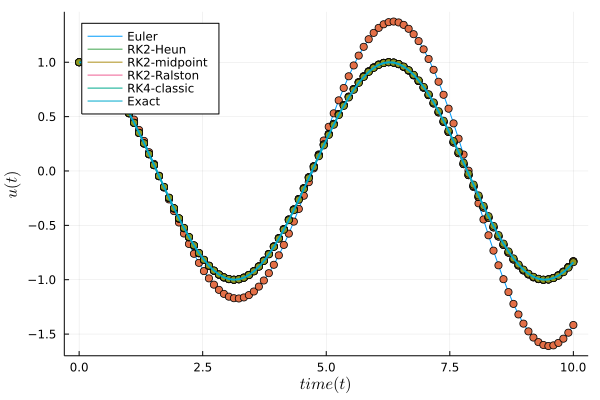

In [659]:
plt = plot()

plot!(ylabel = "\$u(t)\$", xlabel = "\$time (t)\$")
plot!(plt, legend = :topleft)

plot!(plt, t, y_euler[:,1], label = "Euler")
scatter!(plt, t, y_euler[:,1], label = "")

plot!(plt, t, y_RK2Heun[:,1], label = "RK2-Heun")
scatter!(plt, t, y_RK2Heun[:,1], label = "")
plot!(plt, t, y_RK2midpoint[:,1], label = "RK2-midpoint")
scatter!(plt, t, y_RK2midpoint[:,1], label = "")
plot!(plt, t, y_RK2Ralston[:,1], label = "RK2-Ralston")
scatter!(plt, t, y_RK2Ralston[:,1], label = "")

plot!(plt, t, y_RK4step[:,1], label = "RK4-classic")
scatter!(plt, t, y_RK4step[:,1], label = "")

plot!(plt, t, cos.(t), label = "Exact",lw=2)


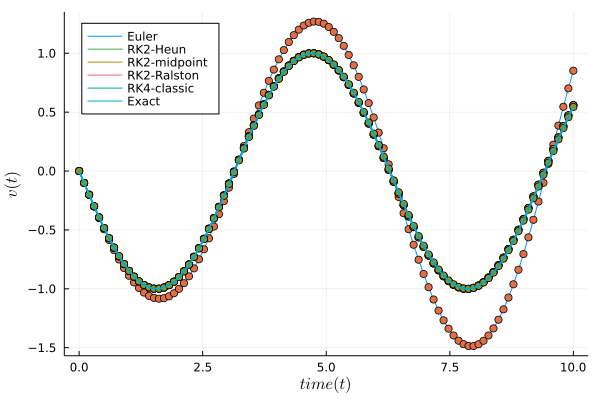

In [660]:
plt = plot()

plot!(ylabel = "\$v(t)\$", xlabel = "\$time (t)\$")
plot!(plt, legend = :topleft)

plot!(plt, t, y_euler[:,2], label = "Euler")
scatter!(plt, t, y_euler[:,2], label = "")

plot!(plt, t, y_RK2Heun[:,2], label = "RK2-Heun")
scatter!(plt, t, y_RK2Heun[:,2], label = "")
plot!(plt, t, y_RK2midpoint[:,2], label = "RK2-midpoint")
scatter!(plt, t, y_RK2midpoint[:,2], label = "")
plot!(plt, t, y_RK2Ralston[:,2], label = "RK2-Ralston")
scatter!(plt, t, y_RK2Ralston[:,2], label = "")

plot!(plt, t, y_RK4step[:,2], label = "RK4-classic")
scatter!(plt, t, y_RK4step[:,2], label = "")

plot!(plt, t, -sin.(t), label = "Exact",lw=2)

***3b)***

Resuelva ahora el sistema del péndulo físico: 

$$
\frac{d}{dt}\left(
    \begin{array}{c}
    y_1 \\
    y_2
    \end{array}
    \right)
    = 
    \left(
    \begin{array}{c}
    y_2 \\
    -sin(y_1)
    \end{array}
    \right)
$$

con con $y_0 = (0.1,0)$ en el intervalo $t=[0,10]$. 

Grafique las soluciones obtenidas. Use varios métodos y modifique el tamaño del paso temporal. Use otros datos iniciales. 

Vea que la función $E(y) = \frac{1}{2} y_2^2 + (1-cos(y_1))$ es constante a lo largo de la evolución (una *constante del movimiento*) y vea que sucede numericamente. 